#### Predicting Diabetes

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

%matplotlib inline

#load and Review data

In [3]:
df=pd.read_csv("pima-data.csv")

In [4]:
df.shape    
#tells the number of rows and columns in the 
# dataframe

(768, 10)

In [5]:
df.head(5)
#gives the first 5 rows of the dataframe

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [6]:
df.tail(5)
#gives the last 5 rows of the dataframe

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


#### DEFINATION OF THE FEATURES
## (what each column name tells about)

## 1. num_preg --> number of pregnancies
## 2. glucose_conc --> plasma glucose concentration a 2hr in a oral glucose tolerance test
## 3. diastolic_bp --> Diastolic blood pressure (mm Hg)
## 4. thickness --> triceps skin fold thickness (mm)
## 5. insulin --> 2-hour serum insulin (mu U/ml)
## 6. bmi --> Body Mass Index
## 7. diab_pred --> Diabetes pedigree function
## 8. Age (years)
## 9. skin --> skin color
## 10. Diabetes --> Class variable(1=true , 0=false) 

In [7]:
#eliminating of the columns
#1. empty columns 
#2. columns with no values 
#2. removing dupliccies in the dataframe

df.isnull().values.any()

False

In [8]:
#creating of a function which plots a graphical correlation matrix for each pair of columns in the dataframe

# function arguments:
# 1. df: pandas dataframe
# 2. size: vertical and the horizontal size of the plot

# function output
#matrix of the correlation between columns. Blue-cyan-yello-red-darkred => less to more correlated
#                                           0--------------------->1
#                                           expect a darkred line running from top left to bottom right 


def plot_corr(df,size=11):
    corr=df.corr()       ##dataframe correlation function
    fig,ax=plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)),corr.columns)
    plt.yticks(range(len(corr.columns)),corr.columns)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


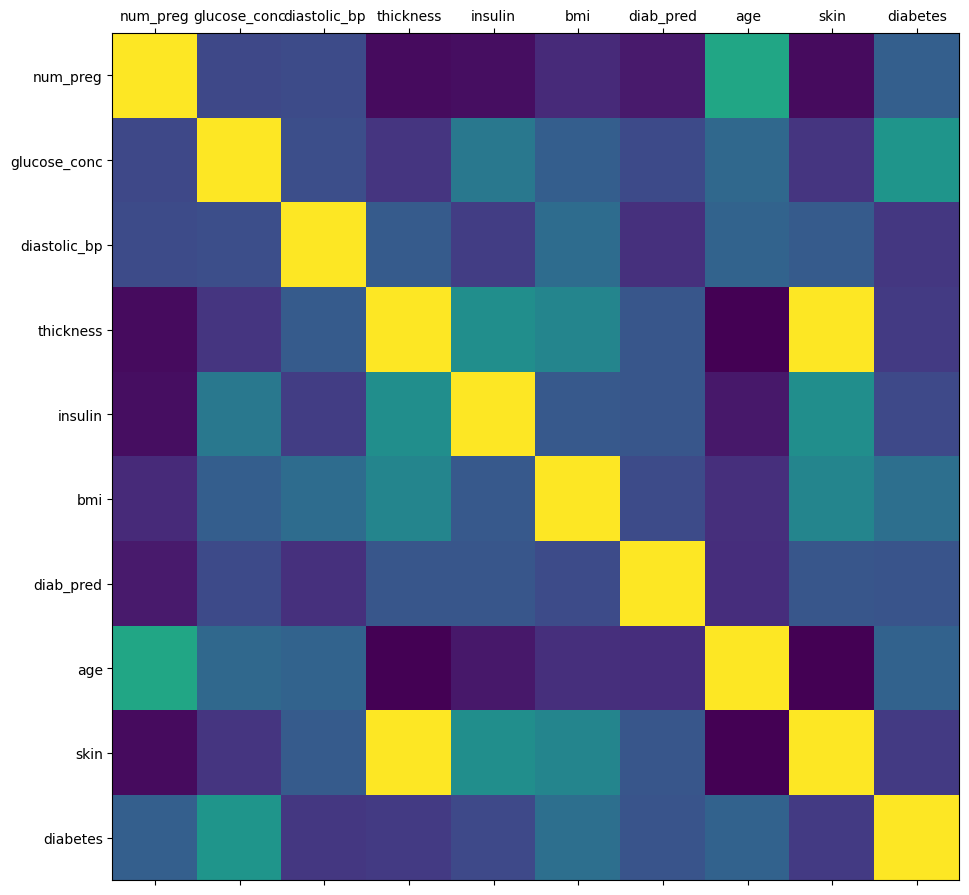

In [9]:
plot_corr(df)
df.corr()

### As from the given coorelation matrix  we can observe that the skin and thickness are changing the values in the same proportion hence as a result that the requirement of the both the both columns doesnt change the proportion of the whole dataframe hence we will eliminate the skin column

### cleaning of the data is done 

In [10]:
del df['skin']

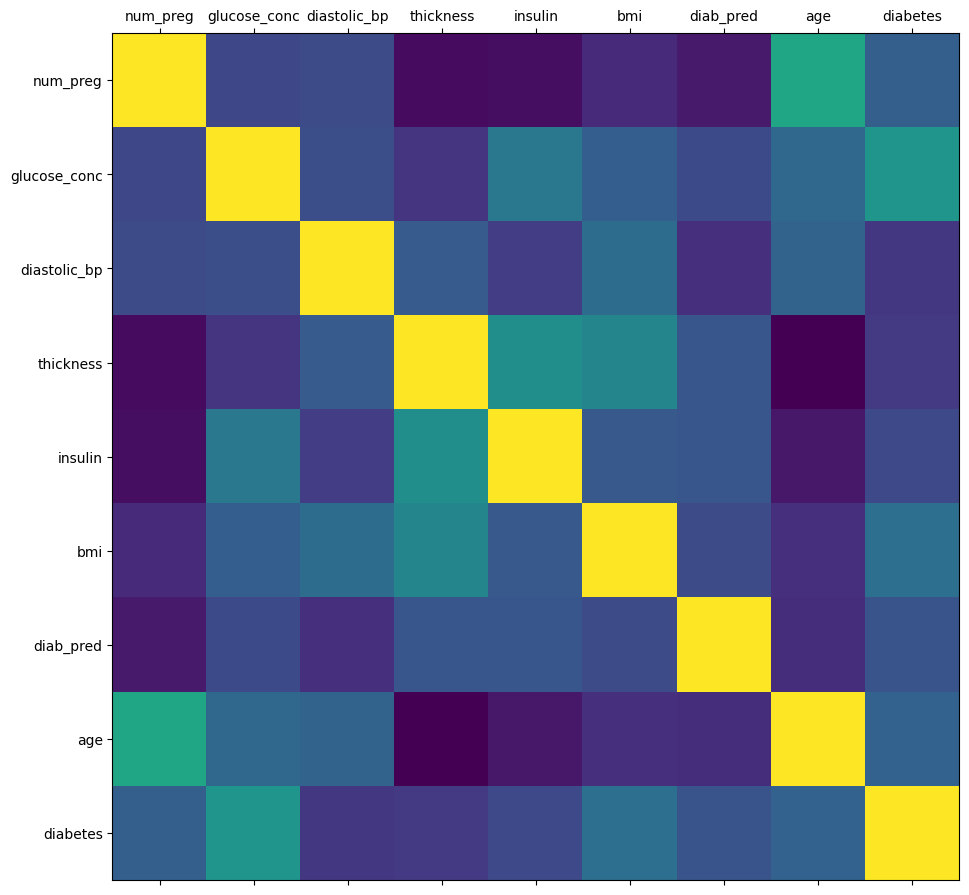

In [11]:
plot_corr(df)

### changing the values of the diabetes column 
### true=1 and false=0

In [12]:
diabetes_map={True:1,False:0}  #creating of the dctionary
df['diabetes']=df['diabetes'].map(diabetes_map)

In [13]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# checking true false ratio

In [14]:
true_values=len(df.loc[df['diabetes']==True])
false_values=len(df.loc[df['diabetes']==False])
print(f"Number of true values= {true_values} ({round((true_values/(true_values+false_values))*100,2)}%)")
print(f"Number of true values= {false_values} ({round((false_values/(true_values+false_values))*100,2)}%)")

Number of true values= 268 (34.9%)
Number of true values= 500 (65.1%)


### Splitting of the data
70% of the data for training 
30% of the data for testing

In [15]:
from sklearn import *
from sklearn.model_selection import train_test_split

In [16]:
feature_columns=['num_preg','glucose_conc','diastolic_bp','thickness','insulin','bmi','diab_pred','age']
predicted_class_names=['diabetes']
x=df[feature_columns].values
y=df[predicted_class_names].values
split_test_size=0.30

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=split_test_size,random_state=42)


In [17]:
print(f"{round((len(x_train)/len(df.index))*100,2)}% in training set")
print(f"{round((len(x_test)/len(df.index))*100,2)}% in test set")


69.92% in training set
30.08% in test set


## post-split data Preperation

In [18]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
print(f"missing rows in glucose_conc: {len(df.loc[df['glucose_conc']==0])}")
print(f"missing rows in diastolic_bp: {len(df.loc[df['diastolic_bp']==0])}")
print(f"missing rows in thickness: {len(df.loc[df['thickness']==0])}")
print(f"missing rows in insulin: {len(df.loc[df['insulin']==0])}")
print(f"missing rows in bmi: {len(df.loc[df['bmi']==0])}")
print(f"missing rows in diab_pred: {len(df.loc[df['diab_pred']==0])}")
print(f"missing rows in age: {len(df.loc[df['age']==0])}")

missing rows in glucose_conc: 5
missing rows in diastolic_bp: 35
missing rows in thickness: 227
missing rows in insulin: 374
missing rows in bmi: 11
missing rows in diab_pred: 0
missing rows in age: 0


## imputing the mean 

In [20]:
from sklearn.impute import SimpleImputer

In [21]:
fill_0=SimpleImputer(missing_values=0,strategy='mean')
X_train=fill_0.fit_transform(x_train)
X_test=fill_0.fit_transform(x_test)

## training on the initial algorithm 
Naive Bayes 

In [22]:
from sklearn.naive_bayes import GaussianNB

nb_model=GaussianNB()
nb_model.fit(x_train,y_train.ravel())

GaussianNB()

## performance on the training data

In [23]:
nb_predict_train=nb_model.predict(X_train)

from sklearn import metrics

print(f"Accuracy: {round(metrics.accuracy_score(y_train,nb_predict_train),4)}")
print()

Accuracy: 0.7561



## preformance on the testing data


In [24]:
nb_test_predict=nb_model.predict(X_test)
from sklearn import metrics

print(f"Accuracy: {round(metrics.accuracy_score(y_test,nb_test_predict),4)}")

Accuracy: 0.7316


#### Metrics

In [25]:
print("confusion Matrics")

print(f"{metrics.confusion_matrix(y_test,nb_test_predict)}")

print("")

print("classification reports")
print(metrics.classification_report(y_test,nb_test_predict))


confucion Matrics
[[116  35]
 [ 27  53]]

classification reports
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       151
           1       0.60      0.66      0.63        80

    accuracy                           0.73       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.73      0.73       231



### Random Forest


In [26]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train.ravel())

RandomForestClassifier(random_state=42)

predicting the training data

In [27]:
rf_predict_train=rf_model.predict(X_train)

print(f"Accuracy: {round(metrics.accuracy_score(y_train,rf_predict_train),4)}")

Accuracy: 0.9534


predicting the test data


In [28]:
rf_predict_test=rf_model.predict(X_test)
print(f"Accuracy: {round(metrics.accuracy_score(y_test,rf_predict_test),4)}")

Accuracy: 0.7576


In [29]:
print("confusion Matrics")

print(f"{metrics.confusion_matrix(y_test,rf_predict_test)}")

print("")

print("classification reports")
print(metrics.classification_report(y_test,rf_predict_test))

confucion Matrics
[[121  30]
 [ 26  54]]

classification reports
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       151
           1       0.64      0.68      0.66        80

    accuracy                           0.76       231
   macro avg       0.73      0.74      0.74       231
weighted avg       0.76      0.76      0.76       231



### Logistic regression


In [30]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(C=0.7,random_state=42)
lr_model.fit(X_train,y_train.ravel())


c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.7, random_state=42)

In [31]:
lr_predict_test=lr_model.predict(X_test)
print(f"Accuracy: {round(metrics.accuracy_score(y_test,lr_predict_test),4)}")

Accuracy: 0.7489


In [32]:
print("confusion Matrics")

print(f"{metrics.confusion_matrix(y_test,lr_predict_test)}")

print("")

print("classification reports")
print(metrics.classification_report(y_test,lr_predict_test))

confucion Matrics
[[125  26]
 [ 32  48]]

classification reports
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       151
           1       0.65      0.60      0.62        80

    accuracy                           0.75       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231



## setting regularization parameter


c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

Int max value of 0.7125 occured at C=[0 0 0 0 1 1 0 1 1 1 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0
 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1
 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1 0
 0 0 0 1 0 0 1 0 0]


c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

Text(0, 0.5, 'recall score')

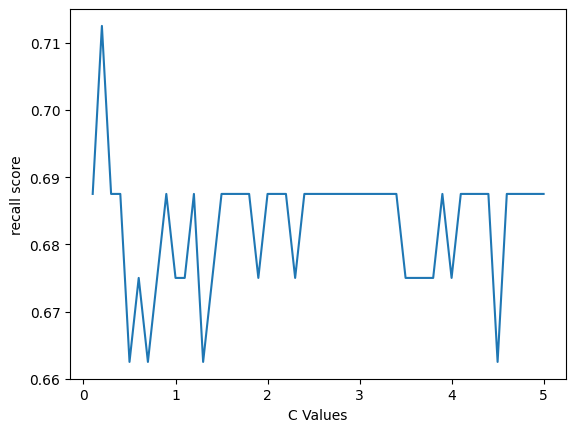

In [35]:
C_start=0.1
C_end=5
C_inc=0.1

C_values,recall_scores=[],[]
C_val=C_start
best_recall_score=0
while (C_val<C_end):
    C_values.append(C_val)
    lr_model_loop=LogisticRegression(C=C_val,class_weight="balanced",random_state=42)
    lr_model_loop.fit(X_train,y_train.ravel())
    lr_predict_loop_test=lr_model_loop.predict(X_test)
    recall_score=metrics.recall_score(y_test,lr_predict_loop_test)
    recall_scores.append(recall_score)
    if(recall_score>best_recall_score):
        best_recall_score=recall_score
        best_lr_predict_test=lr_predict_loop_test

    C_val+=C_inc

best_score_C_val=C_values[recall_scores.index(best_recall_score)]
print(f"Int max value of {best_recall_score} occured at C={best_lr_predict_test}")

%matplotlib inline 
plt.plot(C_values,recall_scores,"-")
plt.xlabel("C Values")
plt.ylabel("recall score")

In [40]:
from sklearn.linear_model import LogisticRegression
lr_model_1=LogisticRegression(class_weight='balanced',C=best_score_C_val,random_state=42)
lr_model_1.fit(X_train,y_train.ravel())
lr_predict_test_1=lr_model_1.predict(X_test)

print("confusion Matrics")

print(f"{metrics.confusion_matrix(y_test,lr_predict_test_1)}")

print("")

print("classification reports")
print(metrics.classification_report(y_test,lr_predict_test_1))

confucion Matrics
[[106  45]
 [ 23  57]]

classification reports
              precision    recall  f1-score   support

           0       0.82      0.70      0.76       151
           1       0.56      0.71      0.63        80

    accuracy                           0.71       231
   macro avg       0.69      0.71      0.69       231
weighted avg       0.73      0.71      0.71       231



c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Logistic Regression Cross validation

In [48]:
from sklearn.linear_model import LogisticRegressionCV


In [53]:
lr_cv_model=LogisticRegressionCV(n_jobs=-1,random_state=42,Cs=3,cv=10,refit=False,class_weight="balanced")
lr_cv_model.fit(X_train,y_train.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, n_jobs=-1,
                     random_state=42, refit=False)

In [56]:
lr_cv_predict_test=lr_cv_model.predict(X_test)


In [57]:
print("confusion Matrics")

print(f"{metrics.confusion_matrix(y_test,lr_cv_predict_test)}")

print("")

print("classification reports")
print(metrics.classification_report(y_test,lr_cv_predict_test))

confusion Matrics
[[109  42]
 [ 26  54]]

classification reports
              precision    recall  f1-score   support

           0       0.81      0.72      0.76       151
           1       0.56      0.68      0.61        80

    accuracy                           0.71       231
   macro avg       0.68      0.70      0.69       231
weighted avg       0.72      0.71      0.71       231

